<a href="https://colab.research.google.com/github/Ngendo-tech/Bitcoin_Prediction/blob/main/BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

read

In [ ]:
df =pd.read_csv("/content/BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [ ]:
df.shape

(2747, 7)

In [ ]:
df.size

19229

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2747 non-null   object 
 1   Open       2747 non-null   float64
 2   High       2747 non-null   float64
 3   Low        2747 non-null   float64
 4   Close      2747 non-null   float64
 5   Adj Close  2747 non-null   float64
 6   Volume     2747 non-null   float64
dtypes: float64(6), object(1)
memory usage: 150.4+ KB


In [ ]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.duplicated().sum()

0

In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03
mean,11668.600272,11981.034949,11325.596907,11682.892099,11682.892099,1.484704e+10
std,16323.683853,16759.568658,15825.584507,16330.191582,16330.191582,1.994819e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.122009,611.894501,606.309479,609.234009,609.234009,8.161285e+07
50%,6371.850098,6500.870117,6285.629883,6376.709961,6376.709961,5.227550e+09
75%,10728.271485,10992.468750,10412.890135,10755.395020,10755.395020,2.500517e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


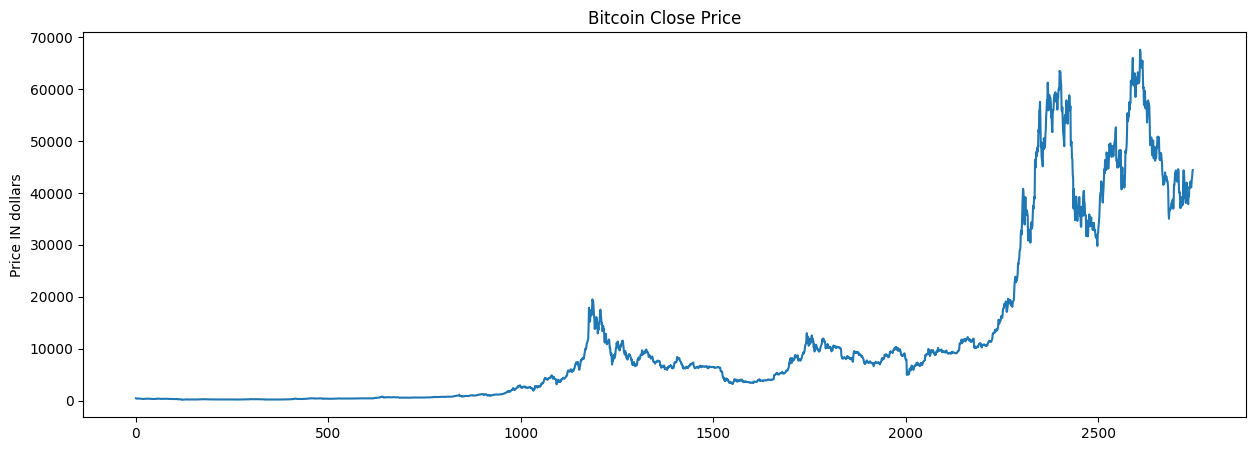

In [14]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Bitcoin Close Price')
plt.ylabel('Price IN dollars')
plt.show()

<ipython-input-16-58876ad8da86>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-16-58876ad8da86>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-16-58876ad8da86>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

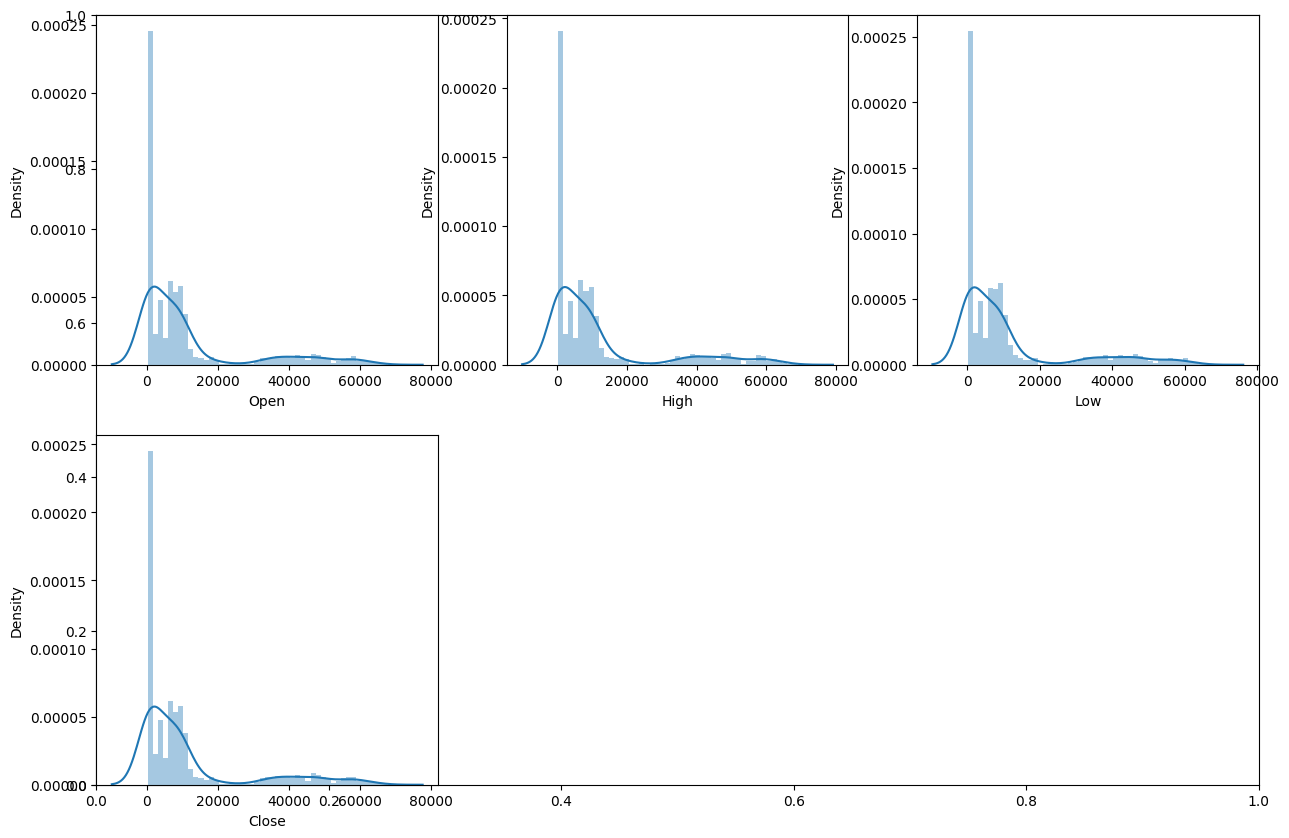

In [16]:
features =['Open','High','Low','Close']
plt.subplots(figsize=(15,10))
for i,col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

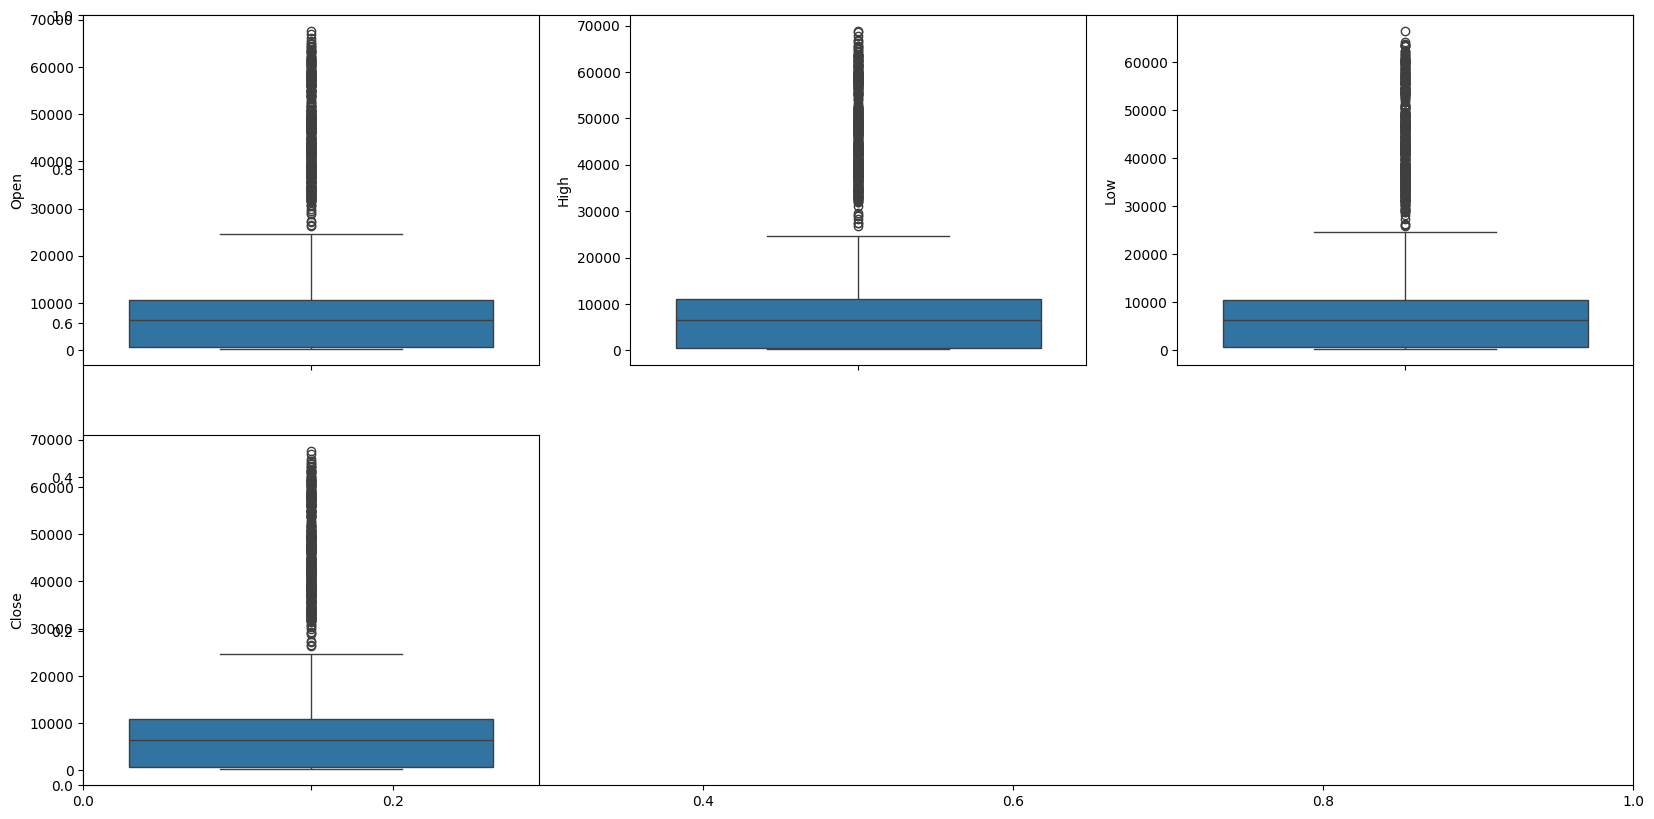

In [17]:
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

In [18]:
df['Date'] = df['Date'].astype(str)  # Convert 'Date' column to string type
splitted = df['Date'].str.split('-', expand=True)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Handle potential errors

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,2014,9,21


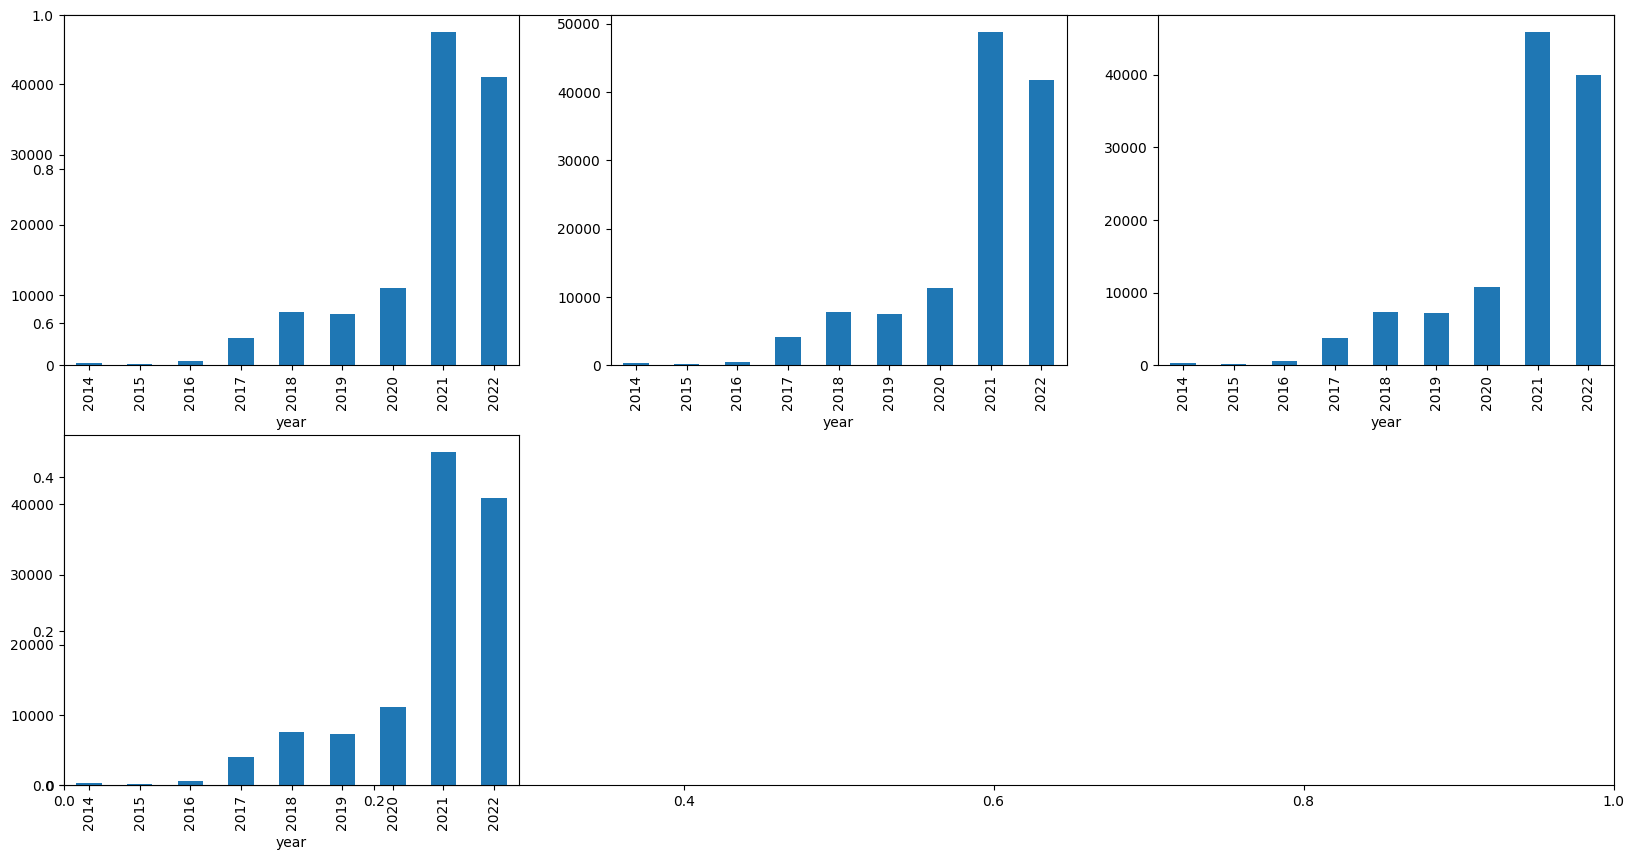

In [19]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i ,col in enumerate(features):
  plt.subplot(2,3,i+1)
  data_grouped[col].plot.bar()
plt.show()

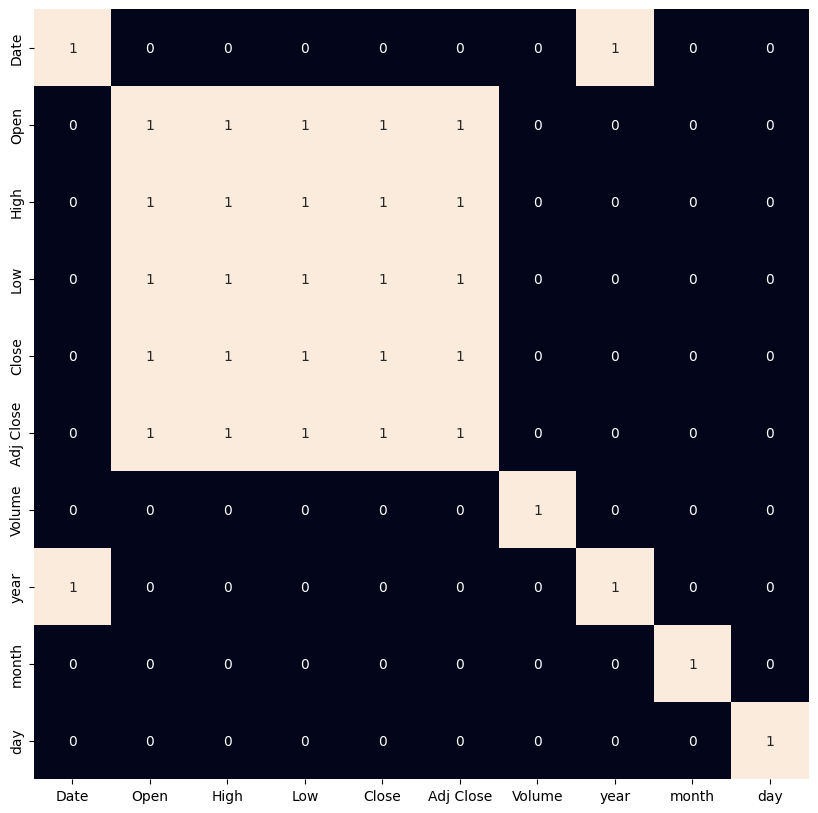

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()>0.9,annot=True,cbar=False)
plt.show()